In [ ]:
from sympy.matrices import Matrix 
import sympy as sp
import numpy as np
from Exercise import Exercise, MarkdownBlock

import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

from process_latex import process_sympy 

try:
    from config import URL, TOKEN
except:
    None

# TODO: replace with supplied strings
Exercise.URL = URL
Exercise.TOKEN = TOKEN

In [ ]:
m = r"What is $@a + @b$?"

params = {}
params["a"] = sp.Matrix(np.arange(4))
params["b"] = sp.Matrix(np.flip(np.arange(4)))

e = Exercise(MarkdownBlock(m, params))
e.add_answer(params["a"] + params["b"], True, "Correct!")
e.display()

e.write("vector_addition")
# e.play()

In [ ]:
m = r"What is $@trace$?"

params = {}
params["trace"] = sp.Trace(sp.Matrix(np.arange(16).reshape((4,4))))

e = Exercise(MarkdownBlock(m, params))

ans = params["trace"].doit()

e.add_answer(ans, True, MarkdownBlock("Correct! $@trace$", params))
e.display()

e.write("trace")
e.play()

In [ ]:
m = r"What is $@inverse$?"

params = {}
params["inverse"] = sp.Inverse(sp.Matrix([[-1, 3/2], [1, -1]]))

e = Exercise(MarkdownBlock(m, params))

ans = params["inverse"].doit()
params["ans"] = ans

e.add_answer(ans, True, MarkdownBlock("Correct! $@inverse = @ans$", params))
e.add_default_feedback(MarkdownBlock("Correct! $@inverse = @ans$", params))
e.display()

e.write("inverse")
e.play()

In [ ]:
def generator():
    m = r"What is $@a + @b$?"
    
    params = {}
    params["a"] = np.random.randint(0, 10)
    params["b"] = np.random.randint(10, 20)
    params["ans"] = params["a"] + params["b"]

    e = Exercise(MarkdownBlock(m, params))
    e.add_answer(params["ans"], True, MarkdownBlock("Yes!", params))
    e.add_default_feedback(MarkdownBlock("No!", params))
    
    return e

Exercise.write_multiple(generator, 100, "int_param")

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

sorted_indices = np.argsort(digits.target)
nums = digits.images[sorted_indices]

In [ ]:
def to_binary(array):
    return np.where(array > 7, 1, 0)

def show(array, filename, binary = True):
    data = to_binary(array) if binary else array 
    fig = plt.figure()
    plt.matshow(data, cmap='gray_r')
    plt.axis('off')
    plt.savefig("{}.png".format(filename), dpi=200, bbox_inches='tight')
    plt.close(fig)

f, axarr = plt.subplots(1,10)
unit = math.floor(len(nums)/10)
start_offset = math.floor((1/2)*unit)
for i in range(0, 10):
    axarr[i].axis('off')
    axarr[i].matshow(np.where(nums[start_offset + i*unit + 1] > 7, 1, 0), cmap="gray_r")

plt.savefig("all_digits.png", dpi=500, bbox_inches='tight') 
# show(nums[7], "zero")
# show(nums[1500], "eight")

In [ ]:
def generator():
    m = """<img src="temp_digit_img.png" height="300">"""
    e = Exercise(m)
    
    show(nums[np.random.randint(1000)].reshape(-1, 1), "temp_digit_img", binary=False)
    return e

Exercise.write_multiple(generator, 10, "digit_vectors")

<class 'numpy.ndarray'>


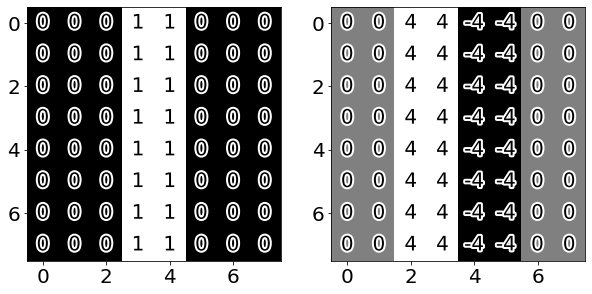

In [73]:
import matplotlib.patheffects as pe
def values_in_matrix(ax, array):
    for (i, j), z in np.ndenumerate(array):
        ax.text(j, i, '{}'.format(int(z)), ha='center', va='center', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

from scipy import ndimage, misc
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
# plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = to_binary(nums[304])
result = ndimage.sobel(ascent, mode="reflect")
values_in_matrix(ax1, ascent)
values_in_matrix(ax2, result)
print(type(result))
ax1.imshow(ascent)
ax2.imshow(result)

plt.show()